In [1]:
import pandas as pd

# Need to specify the headers for this dataset
cols = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
       "num_doors", "body_style", "drive_wheels", "engine_location",
       "wheel_base", "length", "width", "height", "curb_weight", "engine_type",
       "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
       "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg",
       "price"]
cars = pd.read_csv("imports-85.data", names=cols)
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

1. Membuat model untuk memprediksi Harga Mobil (masalah regresi)
2. Prepare data
3. parameternya (faktor)

Goal: minimum eror

# 2. Prepare the Data

In [2]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
import numpy as np

cars = cars.replace('?', np.nan)

# Now lets make things numeric
num_vars = ['normalized_losses', "bore", "stroke", "horsepower", "peak_rpm",
            "price"]

for i in num_vars:
    cars[i] = cars[i].astype('float64')
    
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# how many missing values do we have in the normalized losses column?

In [4]:
print("normalized losses: ", cars['normalized_losses'].isnull().sum())

normalized losses:  41


In [5]:
cars = cars.dropna(subset = ['price'])

In [6]:
cars.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [7]:
cars = cars.dropna(subset = ['bore', 'stroke', 'horsepower', 'peak_rpm'])

In [8]:
cols = ['wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_size', 'bore', 'stroke', 'horsepower',
        'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = cars[cols]

normalized_cars = (cars - cars.mean()) / (cars.std())

# Modeling

In [9]:
# Writing a simple function that trains and tests univariate models
# This function takes in three arguments: the predictor, the outcome, & the data
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [10]:
# Lets test a couple of predictors
print('city mpg: ', knn_train_test('city_mpg', 'price', normalized_cars))
print('width: ', knn_train_test('width', 'price', normalized_cars))
print('highway mpg: ', knn_train_test('highway_mpg', 'price', normalized_cars))
print('engine size: ', knn_train_test('engine_size', 'price', normalized_cars))
print('horsepower: ', knn_train_test('horsepower', 'price', normalized_cars))

city mpg:  0.5989754860190434
width:  0.6716081482458043
highway mpg:  0.5379139941321938
engine size:  0.5366914658415209
horsepower:  0.5715858521357887


In [11]:
def knn_train_test_new(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column from above, train a model, return RMSE value
# and add to the dictionary `rmse_results`.
variables = ['wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_size', 'bore', 'stroke', 'horsepower',
        'peak_rpm', 'city_mpg', 'highway_mpg']

for var in variables:
    rmse_val = knn_train_test_new(var, 'price', normalized_cars)
    k_rmse_results[var] = rmse_val

k_rmse_results

{'bore': {1: 1.2142304178718561,
  3: 0.8676658104821515,
  5: 0.8945878894388075,
  7: 0.9467671617724066,
  9: 0.9538534405319696},
 'city_mpg': {1: 0.6952974785410478,
  3: 0.5903141791339629,
  5: 0.5989754860190434,
  7: 0.5971593862926902,
  9: 0.5772864965222013},
 'curb_weight': {1: 0.8365387787670262,
  3: 0.6439537580173393,
  5: 0.5703129060607424,
  7: 0.5164414998660417,
  9: 0.5183946876303834},
 'engine_size': {1: 0.5545684247705854,
  3: 0.5412565093935547,
  5: 0.5366914658415209,
  7: 0.5189987394476031,
  9: 0.5036282167829259},
 'height': {1: 1.1521894508998922,
  3: 1.0168354498989998,
  5: 0.9401834236117054,
  7: 0.9819240269377942,
  9: 0.9456210661439153},
 'highway_mpg': {1: 0.6940240595042825,
  3: 0.5741639039914224,
  5: 0.5379139941321938,
  7: 0.5349599684013012,
  9: 0.5489908894368629},
 'horsepower': {1: 0.5493171201037932,
  3: 0.5833788965741873,
  5: 0.5715858521357887,
  7: 0.5931467282464424,
  9: 0.590026906989401},
 'length': {1: 0.6571381774710

In [13]:
def knn_train_test_mult(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses
train_cols_2 = ['engine_size', 'highway_mpg']
train_cols_3 = ['engine_size', 'highway_mpg', 'curb_weight']
train_cols_4 = ['engine_size', 'highway_mpg', 'curb_weight',
               'horsepower']
train_cols_5 = ['engine_size', 'highway_mpg', 'curb_weight',
               'horsepower', 'city_mpg']

k_rmse_results = {}

rmse_val = knn_train_test_mult(train_cols_2, 'price', normalized_cars)
k_rmse_results["two best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_3, 'price', normalized_cars)
k_rmse_results["three best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_4, 'price', normalized_cars)
k_rmse_results["four best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_5, 'price', normalized_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {5: 0.49634970383078636},
 'four best features': {5: 0.4815716298131499},
 'three best features': {5: 0.5070723160253117},
 'two best features': {5: 0.4369557956082062}}

In [14]:
def knn_train_test_mult(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = list(range(1,25))
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results_2 = {}

rmse_val = knn_train_test_mult(train_cols_2, 'price', normalized_cars)
k_rmse_results_2["two best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_3, 'price', normalized_cars)
k_rmse_results_2["three best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_4, 'price', normalized_cars)
k_rmse_results_2["four best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_5, 'price', normalized_cars)
k_rmse_results_2["five best features"] = rmse_val

k_rmse_results_2

{'five best features': {1: 0.4837085107028364,
  2: 0.45709593736092696,
  3: 0.45932846135166017,
  4: 0.47702516372024495,
  5: 0.49634970383078636,
  6: 0.5132636783875076,
  7: 0.49909158266517145,
  8: 0.49234720868686166,
  9: 0.4992598621512473,
  10: 0.5032013286262579,
  11: 0.4935218701133113,
  12: 0.5096959637975974,
  13: 0.5166672928179359,
  14: 0.5243033053745184,
  15: 0.5283117579733729,
  16: 0.5337272947756385,
  17: 0.5362951490773643,
  18: 0.5377176071373889,
  19: 0.5436678013136073,
  20: 0.5539062600695402,
  21: 0.5618662526356296,
  22: 0.5639922890751596,
  23: 0.5668629342111043,
  24: 0.567491333952286},
 'four best features': {1: 0.4601169508726334,
  2: 0.4725420938285388,
  3: 0.4957675847479055,
  4: 0.4745760671474318,
  5: 0.4815716298131499,
  6: 0.4988487989184765,
  7: 0.5132199331626774,
  8: 0.5148547739447998,
  9: 0.5176765342389829,
  10: 0.5323478616627898,
  11: 0.5162178429121048,
  12: 0.5118048142095208,
  13: 0.5209366035702818,
  14: 

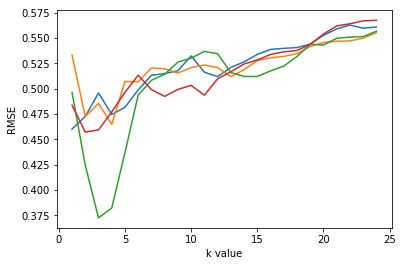

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results_2.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.show()